In [45]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Thu Oct 20 15:45:08 2022
3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]


# G The astropy package

The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages. More informations here: http://www.astropy.org/

The astropy group received US$ 1 million last year to found astropy for 3 years.

https://www.slideshare.net/KelleCruz/astropy-project-update-for-adass

https://learn.astropy.org/

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Constants and Units

http://docs.astropy.org/en/stable/constants/index.html

http://docs.astropy.org/en/stable/units/index.html

In [47]:
import astropy
print(astropy.__version__)
from astropy import constants as const
from astropy import units as u
help(const)

4.3.1
Help on package astropy.constants in astropy:

NAME
    astropy.constants

DESCRIPTION
    Contains astronomical and physical constants for use in Astropy or other
    places.
    
    A typical use case might be::
    
        >>> from astropy.constants import c, m_e
        >>> # ... define the mass of something you want the rest energy of as m ...
        >>> m = m_e
        >>> E = m * c**2
        >>> E.to('MeV')  # doctest: +FLOAT_CMP
        <Quantity 0.510998927603161 MeV>
    
    The following constants are available:
    
    ========== ============== ================ =========================
       Name        Value            Unit       Description
    ========== ============== ================ =========================
        G        6.6743e-11     m3 / (kg s2)   Gravitational constant
       N_A     6.02214076e+23    1 / (mol)     Avogadro's number
        R        8.31446262     J / (K mol)    Gas constant
       Ryd       10973731.6       1 / (m)      Rydberg 

In [48]:
# Pretty printing
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [49]:
# .to change the unit
print(const.c.to('Mpc/yr'))

3.0660139378555056e-07 Mpc / yr


In [50]:
# basic operations are managed
const.c ** 2

<Quantity 8.98755179e+16 m2 / s2>

In [51]:
np.sqrt(const.c)

<Quantity 17314.51581766 m(1/2) / s(1/2)>

In [52]:
print(np.sqrt(const.c))

17314.51581766005 m(1/2) / s(1/2)


In [53]:
# Following the units
M1 = 3 * const.M_sun
M2 = 100 * u.g
Dist = 2.2 * u.au
F = const.G * M1 * M2 / Dist ** 2
print(M1)
print(F)

5.965229612094153e+30 kg
8.225977685950412e+21 g m3 / (AU2 s2)


In [54]:
F

<Quantity 8.22597769e+21 g m3 / (AU2 s2)>

In [55]:
# Convert in more classical unit
print(F.to(u.N))

0.0003675671602160826 N


In [56]:
q = 42.0 * u.meter

In [57]:
q**2

<Quantity 1764. m2>

In [58]:
# Extract only the value
print((q**2).value)
print(q.value**2)

1764.0
1764.0


In [59]:
arr = np.array([q.value, q.value]) * const.G
print(type(arr))
print(arr)

<class 'astropy.units.quantity.Quantity'>
[2.803206e-09 2.803206e-09] m3 / (kg s2)


In [60]:
arr2 = np.ones(2) * q
arr2[1] = q*3
arr2

<Quantity [ 42., 126.] m>

In [61]:
arr = np.ones(2) * q * const.G
print(type(arr))
print(arr)

<class 'astropy.units.quantity.Quantity'>
[2.803206e-09 2.803206e-09] m4 / (kg s2)


In [68]:
# Resolving redondant units
d = 3 * u.km
v = 343 * u.meter / u.second # sound velocity
t = d / v
print(t)
print(t.decompose())

0.008746355685131196 km s / m
8.746355685131196 s


In [69]:
x = 1.0 * u.parsec
print(x.to(u.km))

30856775814913.67 km


In [70]:
lam = 5007 * u.angstrom

In [71]:
print(lam.to(u.nm))
print(lam.to(u.micron))
print(lam.to(u.um))

500.70000000000005 nm
0.5007000000000001 micron
0.5007000000000001 um


In [72]:
# Some transformations needs extra information, available from u.special
print(lam.to(u.GHz, equivalencies=u.spectral()))

598746.6706610745 GHz


In [94]:
from astropy.modeling.models import BlackBody

# wavelengths and spectrum are 1D arrays
# wavelengths between 1000 and ~ 30000 A
temp = 5500 * u.K
wavelengths = np.logspace(3, 4.5, num=1000) * u.AA
wavelengths = wavelengths.to(u.um)
bb_lam = BlackBody(temp, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

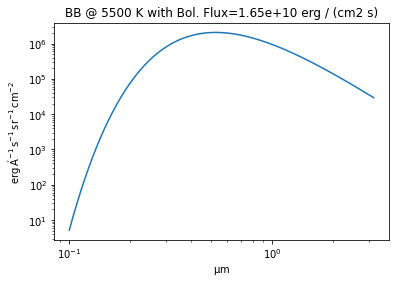

In [96]:
from astropy import visualization
with visualization.quantity_support():
    f, ax = plt.subplots()
    ax.plot(wavelengths, spectrum)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlabel(f'Wavelengths [{wavelengths.unit}]')
    #ax.set_ylabel(f'Flux [{spectrum.unit}]');
    ax.set_title(fr'BB @ {temp:.0f} with Bol. Flux={bb_lam.bolometric_flux:.2e}')

More in http://docs.astropy.org/en/stable/units/index.html

### Data Table

http://docs.astropy.org/en/stable/table/index.html

In [97]:
from astropy.table import Table

In [103]:
# create a table with non homogeneous types
a = [1, 4, 5]
b = [2.0, 5.0, 8.2]
c = ['x', 'y', 'z']
t = Table((a, b, c), names=('a', 'b', 'c'), meta={'name': 'first table'})
print(t)

 a   b   c 
--- --- ---
  1 2.0   x
  4 5.0   y
  5 8.2   z


In [104]:
# Pretty output
t

a,b,c
int64,float64,str1
1,2.0,x
4,5.0,y
5,8.2,z


In [105]:
# One can change the output format
t['b'].format = '7.3f'
t['b'].format = '{:.3f}'
# and add units
t['b'].unit = 's'
t

a,b,c
,s,
int64,float64,str1
1,2.000,x
4,5.000,y
5,8.200,z


In [108]:
t.show_in_browser(jsviewer=True)

In [109]:
# access the column names
t.colnames

['a', 'b', 'c']

In [110]:
# length of the table (number of rows)
len(t)

3

In [111]:
# Acces one element
t['a'][1]

4

In [112]:
# Modify one element
t['a'][1] = 10
t

a,b,c
,s,
int64,float64,str1
1,2.000,x
10,5.000,y
5,8.200,z


In [113]:
# easy add column:
t['d'] = [1, 2, 3]

In [114]:
t

a,b,c,d
,s,,
int64,float64,str1,int64
1,2.000,x,1
10,5.000,y,2
5,8.200,z,3


In [115]:
t.rename_column('a', 'A')
t

A,b,c,d
,s,,
int64,float64,str1,int64
1,2.000,x,1
10,5.000,y,2
5,8.200,z,3


In [116]:
t.add_row([-6.6, -9.3, 'r', 10])
t

A,b,c,d
,s,,
int64,float64,str1,int64
1,2.000,x,1
10,5.000,y,2
5,8.200,z,3
-6,-9.300,r,10


In [117]:
t.add_row([-9, 40, 'q', 10.1])
t

A,b,c,d
,s,,
int64,float64,str1,int64
1,2.000,x,1
10,5.000,y,2
5,8.200,z,3
-6,-9.300,r,10
-9,40.000,q,10


In [118]:
# Masked values
t2 = Table(t, masked=True)
t2['A'].mask = [True, True, False, False, False, False] # True is for the masked values!!
t2

A,b,c,d
,s,,
int64,float64,str1,int64
--,2.000,x,1
--,5.000,y,2
5,8.200,z,3
-6,-9.300,r,10
-9,40.000,q,10


In [119]:
t2['A'].mask = [True, False, False, False, False, False] # True is for the masked values!!
t2

A,b,c,d
,s,,
int64,float64,str1,int64
--,2.000,x,1
10,5.000,y,2
5,8.200,z,3
-6,-9.300,r,10
-9,40.000,q,10


In [141]:
# Creat a table from a table. Use QTable to manage units.
from astropy.table import QTable
t['A'].unit = u.m
tq = QTable(t)
t2 = QTable([tq['A']**2, tq['b']**2, tq['A']**2 / tq['b']**2], names=('a2', 'b2', 'a2/b2'))
t2

a2,b2,a2/b2
m2,s2,m2 / s2
float64,float64,float64
1.0,4.000,0.25
100.0,25.000,4.0
25.0,67.240,0.37180249851279
36.0,86.490,0.4162330905306971
81.0,1600.000,0.050625


In [143]:
# Managing columns
from astropy.table import Column

/tmp/ipykernel_107300/851310836.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array([[2, 5, 4, 5,6, 3], [5,  7, 6]])  # vector column


col0,col1,axis,axis obj
int64,object,str1,object
1,"[2, 5, 4, 5, 6, 3]",x,"AxesSubplot(0.125,0.125;0.352273x0.755)"
4,"[5, 7, 6]",y,"AxesSubplot(0.547727,0.125;0.352273x0.755)"


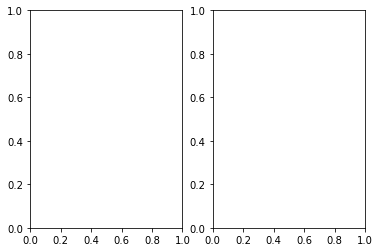

In [145]:
# Create a table combining different formats
a = (1, 4)
b = np.array([[2, 5, 4, 5,6, 3], [5,  7, 6]])  # vector column
c = Column(['x', 'y'], name='axis')
f, (ax1, ax2) = plt.subplots(1,2)
d = Column([ax1, ax2], name='axis obj')

tup = (a, b, c, d)
t3 = Table(tup)  # Data column named "c" has a name "axis" in that table
t3

In [146]:
# table from a dictionnary
rr = {'a': [1, 4],
      'b': [2.0, 5.0],
      'c': ('x', 'y')}
t4 = Table(rr)
t4

a,b,c
int64,float64,str1
1,2.0,x
4,5.0,y


In [147]:
# Create table row by row
t5 = Table(rows=[{'a': 5, 'b': 10}, {'c': 15, 'b': 30}])
t5

a,b,c
int64,int64,int64
5,10,--
--,30,15


In [152]:
# Numpy structured array
arr = np.array([(1, 2.0, 'x'),
                (4, 5.0, 'y')],
               dtype=[('a', 'i8'), ('b', 'f8'), ('c', 'S2')])
print(arr)
print('........................')
t6 = Table(arr)
print(t6)

[(1, 2., b'x') (4, 5., b'y')]
........................
 a   b   c 
--- --- ---
  1 2.0   x
  4 5.0   y


Python arrays versus `numpy` arrays as input

There is a slightly subtle issue that is important to understand in the way that Table objects are created. Any data input that looks like a Python list (including a tuple) is considered to be a list of columns. In contrast an homogeneous numpy array input is interpreted as a list of rows:

In [153]:
t7 = Table(((1,2,3), (4,5,6), (7,8,9)))
t7

col0,col1,col2
int64,int64,int64
1,4,7
2,5,8
3,6,9


In [154]:
arr7 = np.array(((1,2,3), (4,5,6)))
t7 = Table(arr7)
print(arr7)
print(t7)

[[1 2 3]
 [4 5 6]]
col0 col1 col2
---- ---- ----
   1    2    3
   4    5    6


In [156]:
arr = np.array([(1, 2.0, 'x'),
                (4, 5.0, 'y')],
               dtype=[('a', 'i8'), ('b', 'f8'), ('c', 'S2')])
t6 = Table(arr, copy=False) # pointing to the original data
arr['a'][0] = 99
print(arr)
print(t6)

[(99, 2., b'x') ( 4, 5., b'y')]
 a   b   c 
--- --- ---
 99 2.0   x
  4 5.0   y


In [157]:
t6.columns

<TableColumns names=('a','b','c')>

In [158]:
t6.colnames

['a', 'b', 'c']

In [159]:
# One can obtain a numpy structured array from a Table
np.array(t6)

array([(99, 2., b'x'), ( 4, 5., b'y')],
      dtype=[('a', '<i8'), ('b', '<f8'), ('c', 'S2')])

In [160]:
arr = np.arange(9000).reshape(100, 90)  # 100 rows x 90 columns array
t = Table(arr)
print(t)

col0 col1 col2 col3 col4 col5 col6 ... col84 col85 col86 col87 col88 col89
---- ---- ---- ---- ---- ---- ---- ... ----- ----- ----- ----- ----- -----
   0    1    2    3    4    5    6 ...    84    85    86    87    88    89
  90   91   92   93   94   95   96 ...   174   175   176   177   178   179
 180  181  182  183  184  185  186 ...   264   265   266   267   268   269
 270  271  272  273  274  275  276 ...   354   355   356   357   358   359
 360  361  362  363  364  365  366 ...   444   445   446   447   448   449
 450  451  452  453  454  455  456 ...   534   535   536   537   538   539
 540  541  542  543  544  545  546 ...   624   625   626   627   628   629
 ...  ...  ...  ...  ...  ...  ... ...   ...   ...   ...   ...   ...   ...
8370 8371 8372 8373 8374 8375 8376 ...  8454  8455  8456  8457  8458  8459
8460 8461 8462 8463 8464 8465 8466 ...  8544  8545  8546  8547  8548  8549
8550 8551 8552 8553 8554 8555 8556 ...  8634  8635  8636  8637  8638  8639
8640 8641 8642 8643 8644 

In [162]:
t.show_in_browser(jsviewer=True)

In [177]:
# create a simple table to play with
arr = np.arange(15).reshape(5, 3)
t = Table(arr, names=('a', 'b', 'c'), meta={'keywords': {'key1': 'val1'}}, masked=True)
t

a,b,c
int64,int64,int64
0,1,2
3,4,5
6,7,8
9,10,11
12,13,14


In [178]:
t['a'] = [1, -2, 3, -4, 5]  # Set all
t

a,b,c
int64,int64,int64
1,1,2
-2,4,5
3,7,8
-4,10,11
5,13,14


In [179]:
t['a'][2] = 30 # set one
t

a,b,c
int64,int64,int64
1,1,2
-2,4,5
30,7,8
-4,10,11
5,13,14


In [180]:
# set one row
t[1] = (8, 9, 10)
t

a,b,c
int64,int64,int64
1,1,2
8,9,10
30,7,8
-4,10,11
5,13,14


In [181]:
# Set a whole column
t['a'] = 99
t

a,b,c
int64,int64,int64
99,1,2
99,9,10
99,7,8
99,10,11
99,13,14


In [182]:
# Add a column
t.add_column(Column(np.array([1,2,3,4,5]), name='d'))
t

a,b,c,d
int64,int64,int64,int64
99,1,2,1
99,9,10,2
99,7,8,3
99,10,11,4
99,13,14,5


In [183]:
# remove a column
t.remove_column('b')
t

a,c,d
int64,int64,int64
99,2,1
99,10,2
99,8,3
99,11,4
99,14,5


In [184]:
# add a row
t.add_row([-8, -9, 10])
t

a,c,d
int64,int64,int64
99,2,1
99,10,2
99,8,3
99,11,4
99,14,5
-8,-9,10


In [185]:
# Remove some rows
t.remove_rows([1, 2])
t

a,c,d
int64,int64,int64
99,2,1
99,11,4
99,14,5
-8,-9,10


In [186]:
# sort the Table using one column
t.sort('c')
t

a,c,d
int64,int64,int64
-8,-9,10
99,2,1
99,11,4
99,14,5


In [187]:
filter = (t['a'] > 50) & (t['d'] > 3)
print(filter)

[False False  True  True]


In [188]:
t[filter]

a,c,d
int64,int64,int64
99,11,4
99,14,5


In [192]:
t['a'].mask = ~(t['a'] > 50)
t['d'].mask = ~(t['d'] > 3)
t

a,c,d
int64,int64,int64
--,-9,10
99,2,--
99,11,4
99,14,5


In [193]:
%%writefile tab1.dat
#name    obs_date    mag_b  mag_v
M31     2012-01-02  17.0   17.5
M31     2012-01-02  17.1   17.4
M101    2012-01-02  15.1   13.5
M82     2012-02-14  16.2   14.5
M31     2012-02-14  16.9   17.3
M82     2012-02-14  15.2   15.5
M101    2012-02-14  15.0   13.6
M82     2012-03-26  15.7   16.5
M101    2012-03-26  15.1   13.5
M101    2012-03-26  14.8   14.3

Overwriting tab1.dat


In [194]:
# directly read a Table from an ascii file
obs = Table.read('tab1.dat', format='ascii')

In [195]:
obs

name,obs_date,mag_b,mag_v
str4,str10,float64,float64
M31,2012-01-02,17.0,17.5
M31,2012-01-02,17.1,17.4
M101,2012-01-02,15.1,13.5
M82,2012-02-14,16.2,14.5
M31,2012-02-14,16.9,17.3
M82,2012-02-14,15.2,15.5
M101,2012-02-14,15.0,13.6
M82,2012-03-26,15.7,16.5
M101,2012-03-26,15.1,13.5


In [196]:
# Group data
obs_by_name = obs.group_by('name')
obs_by_name

name,obs_date,mag_b,mag_v
str4,str10,float64,float64
M101,2012-01-02,15.1,13.5
M101,2012-02-14,15.0,13.6
M101,2012-03-26,15.1,13.5
M101,2012-03-26,14.8,14.3
M31,2012-01-02,17.0,17.5
M31,2012-01-02,17.1,17.4
M31,2012-02-14,16.9,17.3
M82,2012-02-14,16.2,14.5
M82,2012-02-14,15.2,15.5


In [197]:
print(obs_by_name.groups.keys)

name
----
M101
 M31
 M82


In [198]:
# Using 2 keys to group
print(obs.group_by(['name', 'obs_date']).groups.keys)

name  obs_date 
---- ----------
M101 2012-01-02
M101 2012-02-14
M101 2012-03-26
 M31 2012-01-02
 M31 2012-02-14
 M82 2012-02-14
 M82 2012-03-26


In [199]:
# Extracting a group
print(obs_by_name.groups[1])

name  obs_date  mag_b mag_v
---- ---------- ----- -----
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
 M31 2012-02-14  16.9  17.3


In [201]:
# Using a mask to select entries
mask = obs_by_name.groups.keys['name'] == 'M101'
print(mask)
print(obs_by_name.groups[mask])

[ True False False]
name  obs_date  mag_b mag_v
---- ---------- ----- -----
M101 2012-01-02  15.1  13.5
M101 2012-02-14  15.0  13.6
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3


In [202]:
# Some functions can be applied to the elements of a group
obs_mean = obs_by_name.groups.aggregate(np.mean) 
print(obs_mean)

name       mag_b              mag_v       
---- ------------------ ------------------
M101 15.000000000000002 13.725000000000001
 M31               17.0 17.400000000000002
 M82 15.699999999999998               15.5


In [203]:
print(obs_by_name['name', 'mag_v', 'mag_b'].groups.aggregate(np.mean))

name       mag_v              mag_b       
---- ------------------ ------------------
M101 13.725000000000001 15.000000000000002
 M31 17.400000000000002               17.0
 M82               15.5 15.699999999999998


In [204]:
# creat a new Table on the fly
obs1 = Table.read("""name    obs_date    mag_b  logLx
M31     2012-01-02  17.0   42.5
M82     2012-10-29  16.2   43.5
M101    2012-10-31  15.1   44.5""", format='ascii')

In [205]:
# this is used to stack Tables
from astropy.table import vstack

In [206]:
tvs = vstack([obs, obs1])
tvs

name,obs_date,mag_b,mag_v,logLx
str4,str10,float64,float64,float64
M31,2012-01-02,17.0,17.5,--
M31,2012-01-02,17.1,17.4,--
M101,2012-01-02,15.1,13.5,--
M82,2012-02-14,16.2,14.5,--
M31,2012-02-14,16.9,17.3,--
M82,2012-02-14,15.2,15.5,--
M101,2012-02-14,15.0,13.6,--
M82,2012-03-26,15.7,16.5,--
M101,2012-03-26,15.1,13.5,--


In [207]:
%%writefile data6.dat
Line        Iobs     lambda  rel_er   Obs_code
H  1  4861A 1.00000    4861. 0.08000  Anabel                               
H  1  6563A 2.8667     6563. 0.19467  Anabel                               
H  1  4340A 0.4933     4340. 0.03307  Anabel                               
H  1  4102A 0.2907     4102. 0.02229  Anabel                               
H  1  3970A 0.1800     3970. 0.01253  Anabel                               
N  2  6584A 2.1681     6584. 0.08686  Anabel                               
N  2 121.7m 0.0044621217000. 0.20000  Liu                                  
O  1  6300A 0.0147     6300. 0.00325  Anabel                               
TOTL  2326A 0.07900    2326. 0.20000  Adams                                
C  2 157.6m 0.00856 1576000. 0.20000  Liu                                  
O  1 63.17m 0.13647  631700. 0.10000  Liu                                  
O  1 145.5m 0.00446 1455000. 0.200    Liu                                  
TOTL  3727A 0.77609    3727. 0.200    Torres-Peimbert                      
S II  4070A 0.06174    4070. 0.200    Torres-Peimbert                      
S II  4078A 0.06174    4078. 0.200    Torres-Peimbert                      

Overwriting data6.dat


In [208]:
d = Table.read('data6.dat', format='ascii.fixed_width', 
               col_starts=(0, 12, 20, 29, 38))
d

Line,Iobs,lambda,rel_er,Obs_code
str11,float64,float64,float64,str15
H 1 4861A,1.0,4861.0,0.08,Anabel
H 1 6563A,2.8667,6563.0,0.19467,Anabel
H 1 4340A,0.4933,4340.0,0.03307,Anabel
H 1 4102A,0.2907,4102.0,0.02229,Anabel
H 1 3970A,0.18,3970.0,0.01253,Anabel
N 2 6584A,2.1681,6584.0,0.08686,Anabel
N 2 121.7m,0.004462,1217000.0,0.2,Liu
O 1 6300A,0.0147,6300.0,0.00325,Anabel
TOTL 2326A,0.079,2326.0,0.2,Adams


In [209]:
d.group_by('Obs_code')

Line,Iobs,lambda,rel_er,Obs_code
str11,float64,float64,float64,str15
TOTL 2326A,0.079,2326.0,0.2,Adams
H 1 4861A,1.0,4861.0,0.08,Anabel
H 1 6563A,2.8667,6563.0,0.19467,Anabel
H 1 4340A,0.4933,4340.0,0.03307,Anabel
H 1 4102A,0.2907,4102.0,0.02229,Anabel
H 1 3970A,0.18,3970.0,0.01253,Anabel
N 2 6584A,2.1681,6584.0,0.08686,Anabel
O 1 6300A,0.0147,6300.0,0.00325,Anabel
N 2 121.7m,0.004462,1217000.0,0.2,Liu


There is a lot of possibilities of joining Tables, see http://docs.astropy.org/en/stable/table/operations.html

### Pandas and Table

In [210]:
df = t.to_pandas()

In [211]:
df 

,a,c,d
0,<NA>,-9,10
1,99,2,<NA>
2,99,11,4
3,99,14,5


In [212]:
t2 = Table.from_pandas(df)
t2

a,c,d
int64,int64,int64
--,-9,10
99,2,--
99,11,4
99,14,5


### Downloading from CDS

Look for data on "Diffuse gas" at Vizier: https://vizier.u-strasbg.fr/viz-bin/VizieR

In [215]:
t = Table.read("http://cdsarc.unistra.fr/ftp/J/other/RMxAA/45.261/digeda.dat", 
               format='ascii.cds',
               readme='http://cdsarc.unistra.fr/ftp/J/other/RMxAA/45.261/ReadMe')

In [217]:
t = Table.read("ftp://cdsarc.u-strasbg.fr/pub/cats/J/other/RMxAA/45.261/digeda.dat", 
               format='ascii.cds', 
               readme='ftp://cdsarc.u-strasbg.fr/pub/cats/J/other/RMxAA/45.261/ReadMe')

In [218]:
t

ObsID,Pos,I3727,I4363,IHb,I4959,I5007,I5876,I6300,I6548,IHa,I6583,I6716,I6731,I16+31,Te,R16/31,R07/59,RHa/Hb,EM(Ha),RefID,MType,Slit,Region,GalID,RefN
,pc,,,,,,,,,,,,,,10000 K,,,,pc / cm6,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64
1,0.03,--,--,1.0,0.2,0.6,--,--,--,2.86,1.0,--,--,--,--,--,--,--,--,1,12,3,1,2,1
2,0.03,--,--,1.0,0.33,0.96,--,--,--,2.86,1.32,--,--,--,--,--,--,--,--,1,12,3,1,2,1
3,0.05,--,--,1.0,0.32,0.95,--,--,--,2.86,1.11,--,--,--,--,--,--,--,--,1,12,3,1,2,1
4,0.06,--,--,1.0,0.12,0.36,--,--,--,2.86,1.06,--,--,--,--,--,--,--,--,1,12,3,1,2,1
5,0.07,--,--,1.0,0.27,0.8,--,--,--,2.86,1.08,--,--,--,--,--,--,--,--,1,12,3,1,2,1
6,0.12,--,--,1.0,0.31,0.9,--,--,--,2.86,1.06,--,--,--,--,--,--,--,--,1,12,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,-1.0,--,--,0.35,--,0.33,--,--,--,1.0,--,--,--,--,--,--,--,--,--,18,2,3,3,92,44


In [219]:
t.show_in_browser(jsviewer=True)

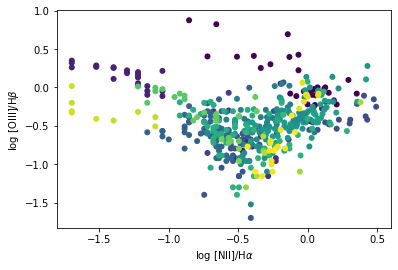

In [221]:
f, ax = plt.subplots()
ax.scatter(np.log10(t['I6583']), np.log10(t['I5007']), c=t['RefN'], edgecolor='None')
ax.set_xlabel(r'log [NII]/H$\alpha$')
ax.set_ylabel(r'log [OIII]/H$\beta$');

In [222]:
t = Table.read("ftp://cdsarc.u-strasbg.fr/pub/cats/VII/253/snrs.dat",
readme="ftp://cdsarc.u-strasbg.fr/pub/cats/VII/253/ReadMe",
format="ascii.cds")

In [223]:
t

SNR,RAh,RAm,RAs,DE-,DEd,DEm,MajDiam,---,MinDiam,u_MinDiam,type,l_S(1GHz),S(1GHz),u_S(1GHz),Sp-Index,u_Sp-Index,Names
,h,min,s,,deg,arcmin,arcmin,,arcmin,,,,Jy,,,,
str11,int64,int64,int64,str1,int64,int64,float64,str1,float64,str1,str2,str1,float64,str1,float64,str1,str26
G000.0+00.0,17,45,44,-,29,0,3.5,x,2.5,--,S,--,100.0,?,0.8,?,Sgr A East
G000.3+00.0,17,46,15,-,28,38,15.0,x,8.0,--,S,--,22.0,--,0.6,--,--
G000.9+00.1,17,47,21,-,28,9,8.0,--,--,--,C,--,18.0,?,--,v,--
G001.0-00.1,17,48,30,-,28,9,8.0,--,--,--,S,--,15.0,--,0.6,?,--
G001.4-00.1,17,49,39,-,27,46,10.0,--,--,--,S,--,2.0,?,--,?,--
G001.9+00.3,17,48,45,-,27,10,1.5,--,--,--,S,--,0.6,--,0.6,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G358.0+03.8,17,26,0,-,28,36,38.0,--,--,--,S,--,1.5,?,--,?,--


In [224]:
t.show_in_browser(jsviewer=True)

In [225]:
t[0:10].write('tab_cds1.tex', format='latex', overwrite=True, formats={'Sp-Index': '%0.2f'})

In [226]:
!cat tab_cds1.tex

\begin{table}
\begin{tabular}{cccccccccccccccccc}
SNR & RAh & RAm & RAs & DE- & DEd & DEm & MajDiam & --- & MinDiam & u_MinDiam & type & l_S(1GHz) & S(1GHz) & u_S(1GHz) & Sp-Index & u_Sp-Index & Names \\
 & $\mathrm{h}$ & $\mathrm{min}$ & $\mathrm{s}$ &  & $\mathrm{deg}$ & $\mathrm{arcmin}$ & $\mathrm{arcmin}$ &  & $\mathrm{arcmin}$ &  &  &  & $\mathrm{Jy}$ &  &  &  &  \\
G000.0+00.0 & 17 & 45 & 44 & - & 29 & 0 & 3.5 & x & 2.5 &  & S &  & 100.0 & ? & 0.80 & ? & Sgr A East \\
G000.3+00.0 & 17 & 46 & 15 & - & 28 & 38 & 15.0 & x & 8.0 &  & S &  & 22.0 &  & 0.60 &  &  \\
G000.9+00.1 & 17 & 47 & 21 & - & 28 & 9 & 8.0 &  &  &  & C &  & 18.0 & ? &  & v &  \\
G001.0-00.1 & 17 & 48 & 30 & - & 28 & 9 & 8.0 &  &  &  & S &  & 15.0 &  & 0.60 & ? &  \\
G001.4-00.1 & 17 & 49 & 39 & - & 27 & 46 & 10.0 &  &  &  & S &  & 2.0 & ? &  & ? &  \\
G001.9+00.3 & 17 & 48 & 45 & - & 27 & 10 & 1.5 &  &  &  & S &  & 0.6 &  & 0.60 &  &  \\
G003.7-00.2 & 17 & 55 & 26 & - & 25 & 50 & 14.0 & x & 11.0 &  & S &  & 2.3 &

In [227]:
t[10:20].write('tab_cds1.ascii', format='ascii', delimiter=';', formats={'Sp-Index': '%0.2f'}, overwrite=True)

In [228]:
!cat tab_cds1.ascii

SNR;RAh;RAm;RAs;DE-;DEd;DEm;MajDiam;---;MinDiam;u_MinDiam;type;l_S(1GHz);S(1GHz);u_S(1GHz);Sp-Index;u_Sp-Index;Names
G004.8+06.2;17;33;25;-;21;34;18.0;;;;S;;3.0;;0.60;;
G005.2-02.6;18;7;30;-;25;45;18.0;;;;S;;2.6;?;0.60;?;
G005.4-01.2;18;2;10;-;24;54;35.0;;;;C?;;35.0;?;0.20;?;Milne 56
G005.5+00.3;17;57;4;-;24;0;15.0;x;12.0;;S;;5.5;;0.70;;
G005.9+03.1;17;47;20;-;22;16;20.0;;;;S;;3.3;?;0.40;?;
G006.1+00.5;17;57;29;-;23;25;18.0;x;12.0;;S;;4.5;;0.90;;
G006.1+01.2;17;54;55;-;23;5;30.0;x;26.0;;F;;4.0;?;0.30;?;
G006.4-00.1;18;0;30;-;23;26;48.0;;;;C;;310.0;;;v;W28
G006.4+04.0;17;45;10;-;21;22;31.0;;;;S;;1.3;?;0.40;?;
G006.5-00.4;18;2;11;-;23;34;18.0;;;;S;;27.0;;0.60;;


In [229]:
t[10:20].write('tab_cds2.ascii', format='ascii.fixed_width', delimiter='', formats={'Sp-Index': '%0.2f'}, overwrite=True)

In [230]:
!cat tab_cds2.ascii

         SNR  RAh  RAm  RAs  DE-  DEd  DEm  MajDiam  ---  MinDiam  u_MinDiam  type  l_S(1GHz)  S(1GHz)  u_S(1GHz)  Sp-Index  u_Sp-Index     Names 
 G004.8+06.2   17   33   25    -   21   34     18.0                              S                 3.0                 0.60                       
 G005.2-02.6   18    7   30    -   25   45     18.0                              S                 2.6          ?      0.60           ?           
 G005.4-01.2   18    2   10    -   24   54     35.0                             C?                35.0          ?      0.20           ?  Milne 56 
 G005.5+00.3   17   57    4    -   24    0     15.0    x     12.0                S                 5.5                 0.70                       
 G005.9+03.1   17   47   20    -   22   16     20.0                              S                 3.3          ?      0.40           ?           
 G006.1+00.5   17   57   29    -   23   25     18.0    x     12.0                S                 4.5                

The astropy Table can also read FITS files (if containing tables), VO tables and hdf5 format. See more there: http://docs.astropy.org/en/stable/io/unified.html

### Time and Dates

The astropy.time package provides functionality for manipulating times and dates. Specific emphasis is placed on supporting time scales (e.g. UTC, TAI, UT1, TDB) and time representations (e.g. JD, MJD, ISO 8601) that are used in astronomy and required to calculate, e.g., sidereal times and barycentric corrections. It uses Cython to wrap the C language ERFA time and calendar routines, using a fast and memory efficient vectorization scheme. More here: http://docs.astropy.org/en/stable/time/index.html

### Coordinates

The coordinates package provides classes for representing a variety of celestial/spatial coordinates, as well as tools for converting between common coordinate systems in a uniform way.

In [231]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [232]:
c = SkyCoord(ra=10.5*u.degree, dec=41.2*u.degree, frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.5, 41.2)>

In [233]:
c = SkyCoord('0 42 00 +41 12 00', frame='icrs', unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.5, 41.2)>

In [234]:
print(c.ra, c.dec)

10d30m00s 41d12m00s


In [235]:
c.to_string('decimal')

'10.5 41.2'

In [236]:
print(c.dec.to_string(format='latex'))

$41^\circ12{}^\prime00{}^{\prime\prime}$


$$41^\circ12{}^\prime00{}^{\prime\prime}$$

### Modeling

astropy.modeling provides a framework for representing models and performing model evaluation and fitting. It currently supports 1-D and 2-D models and fitting with parameter constraints.

It is designed to be easily extensible and flexible. Models do not reference fitting algorithms explicitly and new fitting algorithms may be added without changing the existing models (though not all models can be used with all fitting algorithms due to constraints such as model linearity).

The goal is to eventually provide a rich toolset of models and fitters such that most users will not need to define new model classes, nor special purpose fitting routines (while making it reasonably easy to do when necessary).

http://docs.astropy.org/en/stable/modeling/index.html

More examples: https://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html

### Convolution and filtering

astropy.convolution provides convolution functions and kernels that offers improvements compared to the scipy scipy.ndimage convolution routines, including:

* Proper treatment of NaN values
* A single function for 1-D, 2-D, and 3-D convolution
* Improved options for the treatment of edges
* Both direct and Fast Fourier Transform (FFT) versions
* Built-in kernels that are commonly used in Astronomy

More on http://docs.astropy.org/en/stable/convolution/index.html

### CCD reduction

Ccdproc is is an Astropy affiliated package for basic data reductions of CCD images. It provides the essential tools for processing of CCD images in a framework that provides error propagation and bad pixel tracking throughout the reduction process.

https://ccdproc.readthedocs.io/en/latest/